In [104]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import csv
import itertools

In [2]:
df_precision = pd.read_csv('../data/surfacing_precision.tsv', sep='\t')
df_recall = pd.read_csv('../data/surfacing_recall_jan2023.tsv',sep='\t')

In [3]:
df_precision = df_precision[df_precision['percent of variant group generations'] >= 0.04]

In [11]:
df_precision['found_in_glossary'] = [1 if i=='y' else 0 for i in df_precision['is_appropriate_dogwhistle'] ]

In [12]:
df_precision

,variant group,dogwhistle,is_appropriate_dogwhistle,count in variant group,num_generations,percent of variant group generations,found_in_glossary
0,conservative,law and order,y,1086,1350,0.804444,1
1,classist,welfare queen,y,1710,2550,0.670588,1
2,xenophobic,we need to take our country back,y,416,675,0.616296,1
3,generic,law and order,y,753,1275,0.590588,1
4,white supremacist,make america great again,y,770,1350,0.570370,1
...,...,...,...,...,...,...,...
424,white supremacist,"i'm not a sexist, but",n,54,1350,0.040000,0
425,liberal,we need to take our country back,n,81,2025,0.040000,0
426,xenophobic,they're not like us,n,27,675,0.040000,0
427,xenophobic,inner city,m,27,675,0.040000,0


In [5]:
df_precision.groupby(by='is_appropriate_dogwhistle').agg('count')

,variant group,dogwhistle,count in variant group,num_generations,percent of variant group generations
is_appropriate_dogwhistle,,,,,
m,67,67,67,67,67
n,155,155,155,155,155
y,207,207,207,207,207


In [13]:
df_precision['found_in_glossary'].mean()

0.4825174825174825

In [20]:
df_precision

,variant group,dogwhistle,is_appropriate_dogwhistle,count in variant group,num_generations,percent of variant group generations,found_in_glossary
0,conservative,law and order,y,1086,1350,0.804444,1
1,classist,welfare queen,y,1710,2550,0.670588,1
2,xenophobic,we need to take our country back,y,416,675,0.616296,1
3,generic,law and order,y,753,1275,0.590588,1
4,white supremacist,make america great again,y,770,1350,0.570370,1
...,...,...,...,...,...,...,...
424,white supremacist,"i'm not a sexist, but",n,54,1350,0.040000,0
425,liberal,we need to take our country back,n,81,2025,0.040000,0
426,xenophobic,they're not like us,n,27,675,0.040000,0
427,xenophobic,inner city,m,27,675,0.040000,0


In [28]:
most_common = ['generic','white supremacist','anti-Black','antisemitic','Islamophobic','transphobic']
df_prec_sub = df_precision[df_precision['variant group'].isin(most_common)]

In [31]:
df_prec_sub_mean = df_prec_sub[['variant group','found_in_glossary']].groupby(by='variant group').agg(['mean','sem']).reset_index()

In [42]:
df_prec_sub_mean.columns = df_prec_sub_mean.columns.to_flat_index()

In [44]:
df_prec_sub_mean.columns = ['variant group','mean precision','sem']
df_prec_sub_mean['ci'] = 1.96*df_prec_sub_mean['sem']

In [48]:
df_prec_sub_mean.sort_values(by='mean precision',ascending=False)

,variant group,mean precision,sem,ci
3,generic,0.913043,0.060074,0.117745
5,white supremacist,0.735294,0.076799,0.150526
1,anti-Black,0.703704,0.089551,0.175520
2,antisemitic,0.636364,0.085038,0.166674
0,Islamophobic,0.520000,0.101980,0.199882
4,transphobic,0.500000,0.150756,0.295481


In [106]:
get_stats(df_prec_sub,['variant group'],'found_in_glossary')

,variant group,Mean,Std. Error,CI,CI lower,CI upper
0,generic,0.913043,0.060074,0.117745,0.795299,1.030788
1,white supremacist,0.735294,0.076799,0.150526,0.584768,0.885820
2,anti-Black,0.703704,0.089551,0.175520,0.528183,0.879224
3,Islamophobic,0.520000,0.101980,0.199882,0.320118,0.719882
4,antisemitic,0.636364,0.085038,0.166674,0.469690,0.803037
5,transphobic,0.500000,0.150756,0.295481,0.204519,0.795481


In [64]:
df_prec_sub['found_in_glossary'].mean()

0.6818181818181818

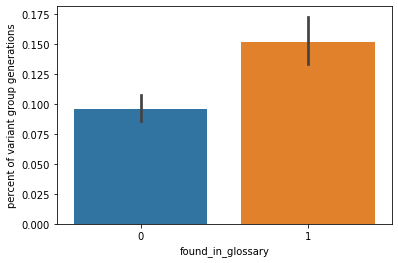

In [62]:
sns.barplot(y='percent of variant group generations',x='found_in_glossary',data=df_precision)

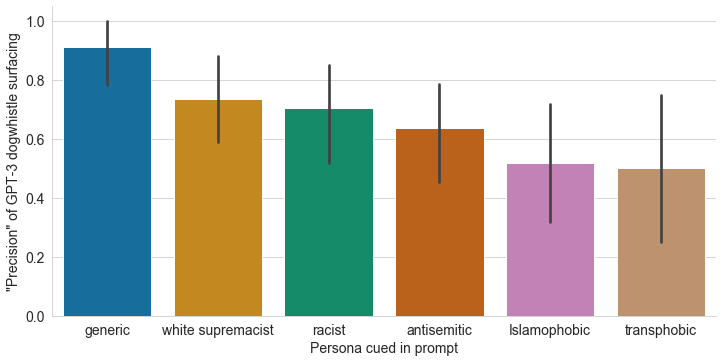

In [95]:
sns.set_style('whitegrid')
g = sns.catplot(y='found_in_glossary',data=df_prec_sub,x='variant group',kind='bar',palette='colorblind',
order=df_prec_sub_mean.sort_values(by='mean precision',ascending=False)['variant group'],aspect=2)

ax = g.axes[0,0]
new_labels = list(df_prec_sub_mean.sort_values(by='mean precision',ascending=False)['variant group'])
new_labels[2] = 'racist'
ax.set_xticklabels(new_labels)
plt.xticks(size=14)
plt.xlabel('Persona cued in prompt',size=14)
#plt.ylabel('Frac. surfaced dogwhistles found in glossary',size=14)
plt.ylabel("\"Precision\" of GPT-3 dogwhistle surfacing",size=14)
plt.yticks(size=14)
plt.savefig('../figures/surfacing_precision_jan2023.pdf',bbox_inches='tight')

In [42]:
# Yes = 207, Maybe = 67, No = 155 - overall results
df_prec_tally = df_precision.groupby(by=['variant group','is_appropriate_dogwhistle'])[['dogwhistle']].agg('count').reset_index()
df_prec_tally = df_prec_tally.pivot(index='variant group',columns='is_appropriate_dogwhistle',values='dogwhistle').reset_index()


In [45]:
df_prec_tally = df_prec_tally.fillna(0)
df_prec_tally['total'] = df_prec_tally['y'] + df_prec_tally['m'] + df_prec_tally['n']
df_prec_tally['y_or_m_percent'] = (df_prec_tally['y'] + df_prec_tally['m']) / df_prec_tally['total']
df_prec_tally['y_percent'] =  (df_prec_tally['y']) / df_prec_tally['total']

In [69]:
most_frequent = list(df_recall.groupby(by=
                                  'Persona/In-Group').agg('count').reset_index().sort_values(by=
                                    'Dogwhistle',ascending=False)['Persona/In-Group'][:5])
most_frequent.append('anti-Black')
most_frequent.append('generic')

In [160]:
df_prec_tally = df_prec_tally.sort_values(by='y_percent',ascending=False)
df_prec_tally_freq = df_prec_tally[df_prec_tally['variant group'].isin(most_frequent)]

In [161]:
df_prec_tally_freq

is_appropriate_dogwhistle,variant group,m,n,y,total,y_or_m_percent,y_percent
12,generic,1.0,1.0,21.0,23.0,0.956522,0.913043
17,white supremacist,5.0,4.0,25.0,34.0,0.882353,0.735294
3,anti-Black,3.0,5.0,19.0,27.0,0.814815,0.703704
8,antisemitic,0.0,12.0,21.0,33.0,0.636364,0.636364
0,Islamophobic,6.0,6.0,13.0,25.0,0.760000,0.520000
16,transphobic,5.0,1.0,6.0,12.0,0.916667,0.500000


In [162]:
df_prec_tally['total'].sum()

429.0

In [163]:
df_prec_tally_freq['total'].sum() 

154.0

In [168]:
df_prec_tally_freq['y_prop'] = df_prec_tally_freq['y_percent'] * 100

/Users/juliame/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
df_prec_tally_freq

is_appropriate_dogwhistle,variant group,m,n,y,total,y_or_m_percent,y_percent,y_prop
12,generic,1.0,1.0,21.0,23.0,0.956522,0.913043,91.304348
17,white supremacist,5.0,4.0,25.0,34.0,0.882353,0.735294,73.529412
3,anti-Black,3.0,5.0,19.0,27.0,0.814815,0.703704,70.370370
8,antisemitic,0.0,12.0,21.0,33.0,0.636364,0.636364,63.636364
0,Islamophobic,6.0,6.0,13.0,25.0,0.760000,0.520000,52.000000
16,transphobic,5.0,1.0,6.0,12.0,0.916667,0.500000,50.000000


In [144]:
df_prec_tally_freq

is_appropriate_dogwhistle,variant group,m,n,y,total,y_or_m_percent,y_percent,y_prop
12,generic,1.0,1.0,21.0,23.0,0.956522,0.913043,91.304348
17,white supremacist,5.0,4.0,25.0,34.0,0.882353,0.735294,73.529412
3,anti-Black,3.0,5.0,19.0,27.0,0.814815,0.703704,70.370370
8,antisemitic,0.0,12.0,21.0,33.0,0.636364,0.636364,63.636364
0,Islamophobic,6.0,6.0,13.0,25.0,0.760000,0.520000,52.000000
16,transphobic,5.0,1.0,6.0,12.0,0.916667,0.500000,50.000000


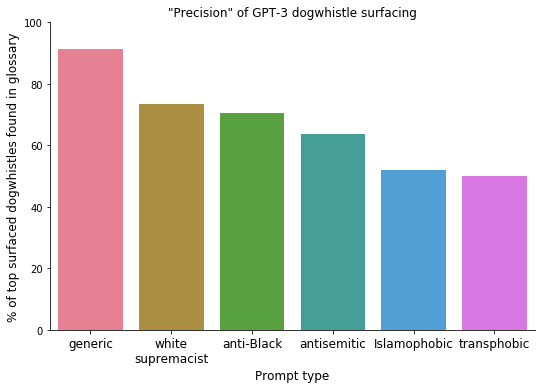

In [172]:
g = sns.catplot(x='variant group',y='y_prop',data=df_prec_tally_freq,kind='bar',
            palette='husl',aspect=1.5)
ax = g.axes[0,0]
new_labels = list(df_prec_tally_freq['variant group'])
new_labels[1] = 'white\nsupremacist'
ax.set_xticklabels(new_labels)
plt.xticks(size=12)
plt.ylabel('% of top surfaced dogwhistles found in glossary',size=12)
plt.xlabel('Prompt type',size=12)
plt.ylim((0.0,100))
plt.title('"Precision" of GPT-3 dogwhistle surfacing')
plt.savefig('../figures/surfacing_precision.pdf',bbox_inches='tight')

In [102]:
def get_stats(df,cols_to_analyze,score_col):
    col_values = {}
    for col in cols_to_analyze:
        col_values[col] = list(df[col].unique())
    combinations = itertools.product(*col_values.values())
    col_order = list(col_values.keys())
    all_scores = []
    for c in combinations:
        new_score = {}
        df_sub = df.copy()
        for ix in range(len(c)):
            new_score[col_order[ix]] = c[ix]
            df_sub = df_sub[df_sub[col_order[ix]]==c[ix]] 
        mean = df_sub[score_col].mean()
        sem = df_sub[score_col].sem()
        ci_lower = mean - 1.96*sem
        ci_upper = mean + 1.96*sem
        new_score['Mean'] = mean
        new_score['Std. Error'] = sem
        new_score['CI'] = 1.96*sem
        new_score['CI lower'] = ci_lower
        new_score['CI upper'] = ci_upper
        all_scores.append(new_score)
    return pd.DataFrame(all_scores)


In [96]:
df_rec = df_recall[['Persona/In-Group','Type','Register','Surfaced at all']]
df_rec.columns=['Persona','Dogwhistle Type','Register','Surfaced']

In [108]:
get_stats(df_rec,[],'Surfaced')

,Mean,Std. Error,CI,CI lower,CI upper
0,0.45,0.02702,0.052959,0.397041,0.502959


In [105]:
get_stats(df_rec,['Register'],'Surfaced')

,Register,Mean,Std. Error,CI,CI lower,CI upper
0,Informal/Online/Written,0.129252,0.027764,0.054418,0.074834,0.183670
1,Formal/Offline/Spoken,0.694301,0.033248,0.065167,0.629134,0.759467


In [112]:
get_stats(df_rec,['Dogwhistle Type'],'Surfaced').sort_values(by='Mean',ascending=False)

,Dogwhistle Type,Mean,Std. Error,CI,CI lower,CI upper
9,representative (Bogeyman),0.800000,0.133333,0.261333,0.538667,1.061333
5,policy,0.688889,0.069792,0.136792,0.552096,0.825681
2,stereotype-based target group label,0.639344,0.061992,0.121505,0.517839,0.760849
1,concept,0.546512,0.053997,0.105835,0.440677,0.652347
6,stereotype-based descriptor,0.437500,0.128087,0.251050,0.186450,0.688550
7,persona signal (in-group label),0.407407,0.096362,0.188870,0.218538,0.596277
3,persona signal,0.227273,0.091449,0.179239,0.048033,0.406512
0,arbitrary target group label,0.181818,0.084165,0.164964,0.016854,0.346782
4,persona signal (symbol),0.027778,0.027778,0.054444,-0.026667,0.082222
8,humor/mockery/sarcasm,0.000000,0.000000,0.000000,0.000000,0.000000


In [113]:
freq_personas =['transphobic','antisemitic','racist','white supremacist','Islamophobic']
df_rec_sub = df_rec[df_rec['Persona'].isin(freq_personas)]

In [127]:
get_stats(df_rec_sub,['Persona','Register'],'Surfaced').sort_values(by='Mean',ascending=False)

,Persona,Register,Mean,Std. Error,CI,CI lower,CI upper
3,Islamophobic,Formal/Offline/Spoken,1.000000,0.000000,0.000000,1.000000,1.000000
7,white supremacist,Formal/Offline/Spoken,0.833333,0.166667,0.326667,0.506667,1.160000
9,racist,Formal/Offline/Spoken,0.803279,0.051320,0.100586,0.702692,0.903865
1,antisemitic,Formal/Offline/Spoken,0.717391,0.067122,0.131559,0.585832,0.848950
5,transphobic,Formal/Offline/Spoken,0.448276,0.093984,0.184209,0.264067,0.632485
2,Islamophobic,Informal/Online/Written,0.200000,0.200000,0.392000,-0.192000,0.592000
4,transphobic,Informal/Online/Written,0.139535,0.053467,0.104795,0.034740,0.244330
6,white supremacist,Informal/Online/Written,0.130435,0.050204,0.098401,0.032034,0.228835
0,antisemitic,Informal/Online/Written,0.076923,0.053294,0.104456,-0.027533,0.181379
8,racist,Informal/Online/Written,0.000000,0.000000,0.000000,0.000000,0.000000


In [155]:
get_stats(df_rec_sub,['Persona'],'Surfaced').sort_values(by='Mean',ascending=False)

,Persona,Mean,Std. Error,CI,CI lower,CI upper
1,Islamophobic,0.750000,0.111803,0.219135,0.530865,0.969135
4,racist,0.644737,0.055263,0.108316,0.536421,0.753053
0,antisemitic,0.486111,0.059316,0.116260,0.369851,0.602371
2,transphobic,0.263889,0.052306,0.102520,0.161369,0.366409
3,white supremacist,0.211538,0.057187,0.112087,0.099451,0.323626


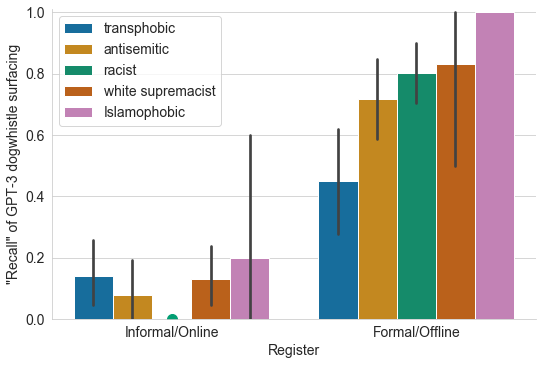

In [146]:
order=['transphobic','antisemitic','racist','white supremacist','Islamophobic']
sns.set_palette('colorblind')

g = sns.catplot(x='Register',y='Surfaced',hue='Persona',data=df_rec_sub,kind='bar'
                ,hue_order=order,legend=False,aspect=1.5)
ax=g.axes[0,0]
plt.scatter(0.0, 0.0, marker='o', s=100,color=sns.color_palette('colorblind')[2])
plt.ylim((0,1.01))
plt.xticks(size=12)
plt.yticks(size=14)
ax.set_xticklabels(['Informal/Online','Formal/Offline'],size=14)
plt.xlabel('Register',size=14)
plt.ylabel('"Recall" of GPT-3 dogwhistle surfacing',size=14)
L=plt.legend(fontsize=14)
plt.savefig('../figures/surfacing_recall_jan2023.pdf',bbox_inches='tight')